<a href="https://colab.research.google.com/github/vardanagarwal/SIH/blob/master/clustering_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import zipfile
zf = zipfile.ZipFile('/content/drive/My Drive/data/csv_files.zip', "r")
zf.extractall()

In [0]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [0]:
df = pd.read_csv('sky_normalization_for_clustering.csv')
df1 = df.iloc[:, 2:]

In [0]:
def Elbow(X):
  inertias = [] 
  mapping = {} 
  K = range(1,10) 
    
  for k in K: 
      #Building and fitting the model 
      model = KMeans(n_clusters=k).fit(X) 
      model.fit(X)     
      inertias.append(model.inertia_) 
      mapping[k] = model.inertia_ 
      
  for key,val in mapping.items(): 
      print(str(key)+' : '+str(val))
  plt.figure() 
  plt.plot(K, inertias, 'bx-') 
  plt.xlabel('Values of K') 
  plt.ylabel('Inertia') 
  plt.title('The Elbow Method using Inertia') 
  plt.show()

#First level KMeans

1 : 53651.60628999139
2 : 12856.764812077212
3 : 9762.545636223038
4 : 7274.619535323133
5 : 6290.065959642681
6 : 5468.254899566658
7 : 4898.951554994039
8 : 4353.904055471647
9 : 3909.7195844455796


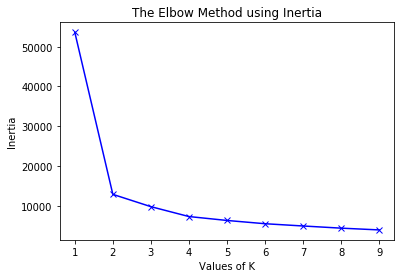

In [4]:
Elbow(df1)

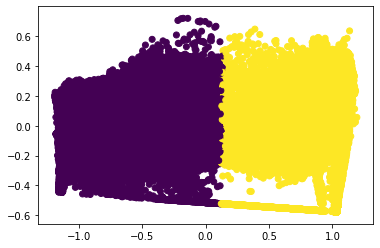

In [5]:
kmeans = KMeans(n_clusters=2, init='k-means++')
y = kmeans.fit_predict(df1)
pca = PCA(n_components=2).fit_transform(df1)
plt.figure('Kmeans with 2 clusters')
plt.scatter(pca[:, 0], pca[:, 1], c=kmeans.labels_)
plt.show()
df_temp = pd.DataFrame(kmeans.labels_)
df_temp.columns = ['labels']
df2 = pd.concat([df.iloc[:, 0:2], df_temp], axis=1)

In [0]:
df2.to_csv('kmeans_clustered.csv', index=False)

#Second level KMeans

In [21]:
df3 = pd.concat([df, df_temp], axis=1)
df_zero = df3[df3['labels'] == 0]
df_one = df3[df3['labels'] == 1]
df_zero.reset_index(inplace=True)
df_one.reset_index(inplace=True)
df_zero1 = df_zero.iloc[:, 3:-1]
df_one1 = df_one.iloc[:, 3:-1]
df_one1

,r,g,b,h,s,v,y,cr,cb
0,0.324184,0.359367,0.438620,0.600741,0.294341,0.445307,0.357870,0.477874,0.547593
1,0.331516,0.298271,0.324695,0.828404,0.130150,0.339946,0.311235,0.516502,0.509446
2,0.413949,0.278540,0.255060,0.025228,0.388530,0.413955,0.316100,0.571706,0.467524
3,0.454830,0.303032,0.285516,0.024628,0.376457,0.454842,0.346492,0.579303,0.467548
4,0.383929,0.173407,0.167107,0.112183,0.573534,0.383944,0.235625,0.607901,0.463159
...,...,...,...,...,...,...,...,...,...
33817,0.177668,0.177668,0.177668,0.000000,0.000000,0.177668,0.177668,0.501961,0.501961
33818,0.184129,0.184129,0.184129,0.000000,0.000000,0.184129,0.184129,0.501961,0.501961
33819,0.234380,0.234380,0.234380,0.000000,0.000000,0.234380,0.234380,0.501961,0.501961
33820,0.344124,0.344124,0.344124,0.000000,0.000000,0.344124,0.344124,0.501961,0.501961


1 : 6739.931768372577
2 : 3768.712124989624
3 : 2879.8591930066646
4 : 2354.950518945806
5 : 1927.5377825266007
6 : 1661.454848230351
7 : 1511.9560952441436
8 : 1370.9531591638004
9 : 1247.6228926205865


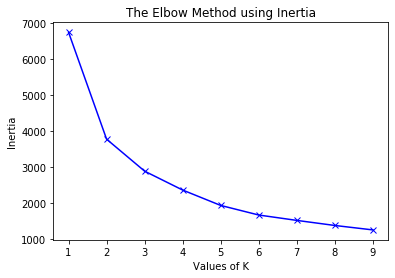

1 : 6116.832924791049
2 : 3597.300576355562
3 : 2752.609862935858
4 : 2146.2099754152323
5 : 1731.2647576572276
6 : 1481.2560965381954
7 : 1299.7988821874678
8 : 1133.3493825246699
9 : 1002.2276903334553


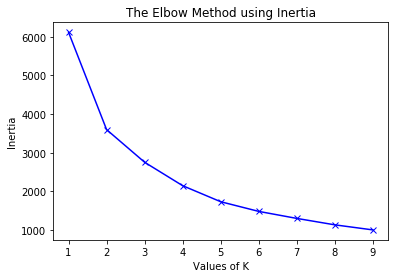

In [22]:
Elbow(df_zero1)
Elbow(df_one1)

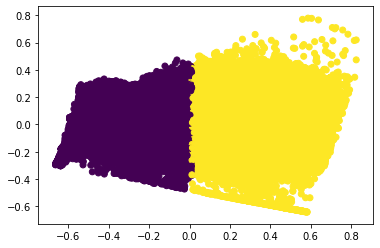

In [27]:
kmeans = KMeans(n_clusters=2, init='k-means++')
y = kmeans.fit_predict(df_zero1)
pca = PCA(n_components=2).fit_transform(df_zero1)
plt.figure('Kmeans with 2 clusters')
plt.scatter(pca[:, 0], pca[:, 1], c=kmeans.labels_)
plt.show()
df_temp = pd.DataFrame(kmeans.labels_)
df_temp.columns = ['labels']
df_zero2 = pd.concat([df_zero.iloc[:, 0:1], df_temp], axis=1)

In [28]:
df_zero2

,index,labels
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1
...,...,...
48166,81983,0
48167,81984,0
48168,81985,0
48169,81989,1


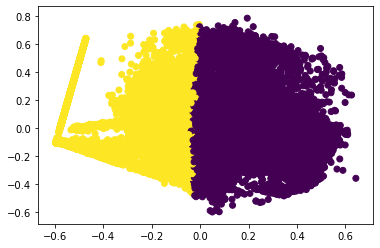

In [33]:
kmeans = KMeans(n_clusters=2, init='k-means++')
y = kmeans.fit_predict(df_one1)
pca = PCA(n_components=2).fit_transform(df_one1)
plt.figure('Kmeans with 2 clusters')
plt.scatter(pca[:, 0], pca[:, 1], c=kmeans.labels_)
plt.show()
df_temp = pd.DataFrame(kmeans.labels_)
df_temp.columns = ['labels']
df_temp.replace(0, 2, inplace=True)
df_temp.replace(1, 3, inplace=True)
df_one2 = pd.concat([df_one.iloc[:, 0:1], df_temp], axis=1)

In [34]:
df_one2

,index,labels
0,15,2
1,60,2
2,95,3
3,100,3
4,135,3
...,...,...
33817,81986,3
33818,81987,3
33819,81988,3
33820,81991,3


#Merging

In [0]:
df_zero2 = df_zero2.set_index('index')
df_one2 = df_one2.set_index('index')

In [0]:
df_done = pd.concat([df_zero2, df_one2])
df2.insert(3, 'Div_labels', df_done.iloc[:, :])

In [41]:
df2

,cam_id,filename,labels,Div_labels
0,10066,20130101_084634.jpg,0,0
1,10066,20130101_091628.jpg,0,0
2,10066,20130101_114638.jpg,0,1
3,10066,20130101_125725.jpg,0,1
4,10066,20130101_154632.jpg,0,1
...,...,...,...,...
81988,9730,20131231_052708.jpg,1,3
81989,9730,20131231_095706.jpg,0,1
81990,9730,20131231_105659.jpg,0,0
81991,9730,20131231_162701.jpg,1,3


In [0]:
df2.to_csv('kmeans_double_clustered.csv', index=False)